In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings

In [4]:
complete_df = pd.read_csv('complete.csv')
print(complete_df.shape)
complete_df.columns

(17701, 17)


Index(['Count', 'Zipcode', 'Type', 'Owner Occ?', 'Purchase Down %',
       'Purchase Amt', 'Amount Mortgaged', 'Mtg Tx Pd', 'Mansion Tax Pd',
       'New Sales Tax Amount', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Median Gross Rent', 'Poverty Count',
       'Poverty Rate'],
      dtype='object')

In [5]:
investor_df = complete_df[(complete_df['Owner Occ?'] ==1)]
investor_df.head(2)

,Count,Zipcode,Type,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Per Capita Income,Median Gross Rent,Poverty Count,Poverty Rate
7996,1,11201,CND,1.0,100.0,2700000.0,0.0,0.0,27000.0,119826.0000,69755.0,35.1,163310.0,108933.0,3110.0,7004.0,10.040857
7997,1,11201,CND,1.0,52.0,5173120.0,2500000.0,48750.0,51731.2,229583.0656,69755.0,35.1,163310.0,108933.0,3110.0,7004.0,10.040857


In [6]:
investor_df['Type'].value_counts()

SFR    5248
CND    4457
Name: Type, dtype: int64

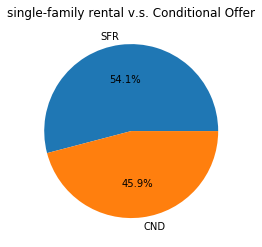

In [7]:
type_series = investor_df['Type'].value_counts()

plt.pie(type_series.values,labels=type_series.index.values,autopct='%1.1f%%')
plt.title("single-family rental v.s. Conditional Offer")
plt.show()

In [8]:
investor_df['Zipcode'].value_counts().sort_index()

10007     207
10013     506
10282      19
10453      15
10457      50
11201     510
11203     222
11204     191
11205     107
11206      85
11207     104
11208     109
11209     345
11210     340
11211     192
11212      85
11213      71
11214     273
11215     373
11216      91
11217     170
11218     172
11219      95
11220     111
11221      45
11222     127
11223     236
11224     166
11225     110
11226     139
11228     306
11229     612
11230     185
11231     200
11232      42
11233      43
11234    1160
11235     332
11236     248
11237      35
11238     290
11239      13
11249     220
11355     584
11368     169
Name: Zipcode, dtype: int64

In [9]:
investor_by_zip = investor_df.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            'Per Capita Income': 'mean'})


investor_by_zip["Purchase Amt"] = investor_by_zip["Purchase Amt"] / 10000
investor_by_zip["Amount Mortgaged"] = investor_by_zip["Amount Mortgaged"] / 10000
investor_by_zip["Mtg Tx Pd"] = investor_by_zip["Mtg Tx Pd"] / 1000
investor_by_zip["Mansion Tax Pd"] = investor_by_zip["Mansion Tax Pd"] / 1000
investor_by_zip["New Sales Tax Amount"] = investor_by_zip["New Sales Tax Amount"] / 1000
investor_by_zip["Per Capita Income"] = investor_by_zip["Per Capita Income"] / 1000

investor_by_zip["Purchase Amt"] = investor_by_zip["Purchase Amt"].map("{:.2f}".format)
investor_by_zip["Purchase Down %"] = investor_by_zip["Purchase Down %"].map("{:.2f}".format)
investor_by_zip["Amount Mortgaged"] = investor_by_zip["Amount Mortgaged"].map("{:.2f}".format)
investor_by_zip["Mtg Tx Pd"] = investor_by_zip["Mtg Tx Pd"].map("{:.2f}".format)
investor_by_zip["Mansion Tax Pd"] = investor_by_zip["Mansion Tax Pd"].map("{:.2f}".format)
investor_by_zip["New Sales Tax Amount"] = investor_by_zip["New Sales Tax Amount"].map("{:.2f}".format)
investor_by_zip["Per Capita Income"] = investor_by_zip["Per Capita Income"].map("{:.2f}".format)

investor_by_zip["Purchase Amt"] = investor_by_zip["Purchase Amt"].astype("float")
investor_by_zip["Purchase Down %"] = investor_by_zip["Purchase Down %"].astype("float")
investor_by_zip["Amount Mortgaged"] = investor_by_zip["Amount Mortgaged"].astype("float")
investor_by_zip["Mtg Tx Pd"] = investor_by_zip["Mtg Tx Pd"].astype("float")
investor_by_zip["Mansion Tax Pd"] = investor_by_zip["Mansion Tax Pd"].astype("float")
investor_by_zip["New Sales Tax Amount"] = investor_by_zip["New Sales Tax Amount"].astype("float")
investor_by_zip["Per Capita Income"] = investor_by_zip["Per Capita Income"].astype("float")

In [10]:
print(investor_by_zip.shape)

investor_by_zip.head(2)

(45, 8)


,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income
Zipcode,,,,,,,,
10007,207,348.30,63.92,159.52,31.09,34.67,154.58,191.71
10013,506,395.44,65.75,148.59,28.97,39.08,175.49,157.38


In [11]:
investor_by_zip["total_tax_paid"] = investor_by_zip["Mtg Tx Pd"] + investor_by_zip["Mansion Tax Pd"]
investor_by_zip.head(2)

,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income,total_tax_paid
Zipcode,,,,,,,,,
10007,207,348.30,63.92,159.52,31.09,34.67,154.58,191.71,65.76
10013,506,395.44,65.75,148.59,28.97,39.08,175.49,157.38,68.05


In [12]:
investor_by_zip.dtypes

Count                     int64
Purchase Amt            float64
Purchase Down %         float64
Amount Mortgaged        float64
Mtg Tx Pd               float64
Mansion Tax Pd          float64
New Sales Tax Amount    float64
Per Capita Income       float64
total_tax_paid          float64
dtype: object

In [13]:
zipcode_list = investor_by_zip.index.values.astype("str")
zipcode_list

array(['10007', '10013', '10282', '10453', '10457', '11201', '11203',
       '11204', '11205', '11206', '11207', '11208', '11209', '11210',
       '11211', '11212', '11213', '11214', '11215', '11216', '11217',
       '11218', '11219', '11220', '11221', '11222', '11223', '11224',
       '11225', '11226', '11228', '11229', '11230', '11231', '11232',
       '11233', '11234', '11235', '11236', '11237', '11238', '11239',
       '11249', '11355', '11368'], dtype='<U21')

## zipcodes of Manhattan: 10013, 10007, 10118, 10282, 10453, 11355, 10457, 11368
## The rest of zipcodes are in Brooklyn.

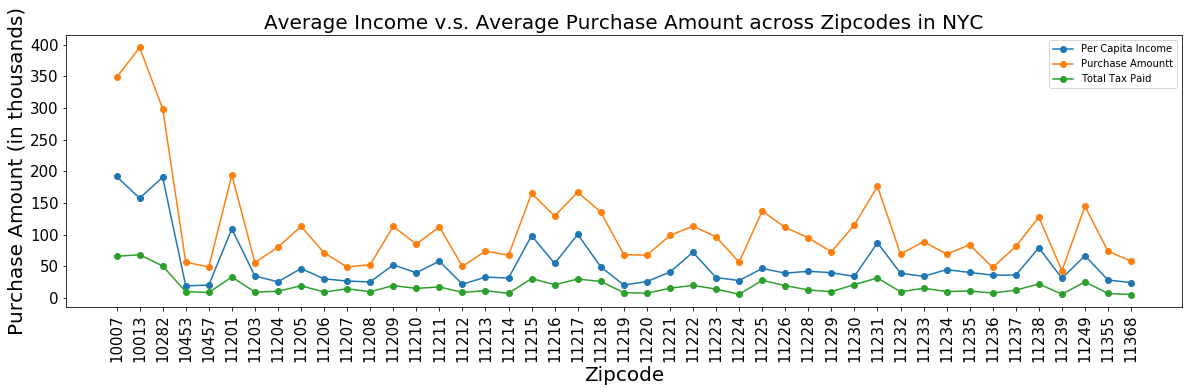

In [14]:
plt.figure(figsize=(20,5))

plt.plot(zipcode_list, investor_by_zip["Per Capita Income"], marker="o", label='Per Capita Income')
plt.plot(zipcode_list, investor_by_zip["Purchase Amt"], marker="o", label='Purchase Amountt')
plt.plot(zipcode_list, investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
plt.xticks(zipcode_list, rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Purchase Amount (in thousands)', fontsize=20)
plt.title('Average Income v.s. Average Purchase Amount across Zipcodes in NYC', fontsize=20)
plt.legend()
plt.show()

## Generate Manhattan dataframe

In [15]:
manhattan_df = investor_by_zip.loc[[10013, 10007, 10282, 10453, 11355, 10457, 11368], :].sort_values("Purchase Amt", ascending=False)
print(manhattan_df.shape)
manhattan_df.head(8)

(7, 9)


,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income,total_tax_paid
Zipcode,,,,,,,,,
10013,506,395.44,65.75,148.59,28.97,39.08,175.49,157.38,68.05
10007,207,348.30,63.92,159.52,31.09,34.67,154.58,191.71,65.76
10282,19,298.71,63.32,105.30,20.50,29.87,132.57,190.52,50.37
11355,584,73.47,65.27,27.62,5.18,1.76,32.61,28.13,6.94
11368,169,58.09,55.09,24.15,4.45,0.77,25.78,24.23,5.22
10453,15,56.47,30.53,52.15,9.80,0.00,25.06,19.02,9.80
10457,50,48.76,18.54,43.16,8.13,0.43,21.64,20.19,8.56


In [16]:
mindex_list = manhattan_df.index.values

for zipcode in mindex_list:
    manhattan_df.rename(index={zipcode: str(zipcode)}, inplace=True)

manhattan_df.index.name = "Manhattan Zipcode"

mindex_list = manhattan_df.index.values 
mindex_list

array(['10013', '10007', '10282', '11355', '11368', '10453', '10457'],
      dtype=object)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

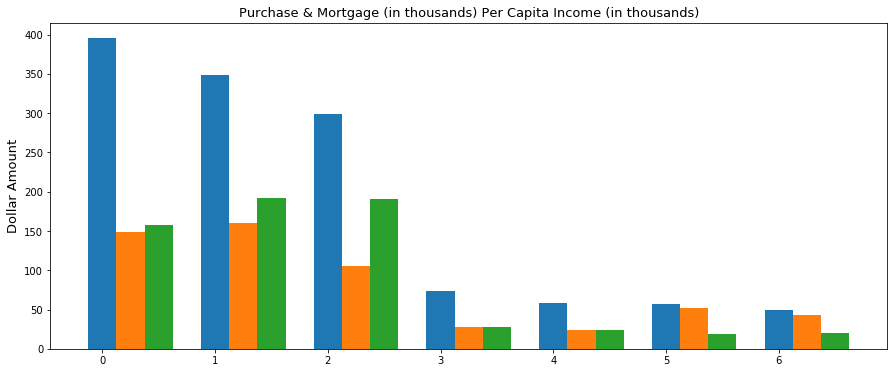

In [17]:
species = mindex_list

housing_data = {
    'Purchase Amt': manhattan_df["Purchase Amt"].values,
    'Amount Mortgaged': manhattan_df["Amount Mortgaged"].values,
    'Per Capita Income': manhattan_df["Per Capita Income"].values,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,6))

for attribute, measurement in housing_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollar Amount', fontsize=13)
ax.set_title('Purchase & Mortgage (in thousands) Per Capita Income (in thousands)', fontsize=13)
ax.set_xticks(x + width, species)
ax.set_xlabel("Manhattan Zipcode", fontsize=13)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 500)
plt.suptitle('Purchase Amount v.s. Amount Mortgaged v.s. Per Capita Income in Manhattan', fontsize=15)
plt.show()

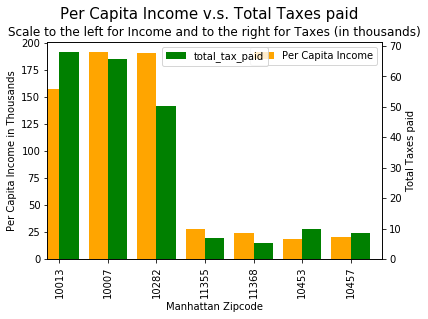

In [18]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

manhattan_df["Per Capita Income"].plot(kind='bar', color='Orange', ax=ax, width=width, position=1)
manhattan_df["total_tax_paid"].plot(kind='bar', color='green', ax=ax2, width=width, position=0)

ax.set_ylabel('Per Capita Income in Thousands')
ax2.set_ylabel('Total Taxes paid')
ax.set_title('Scale to the left for Income and to the right for Taxes (in thousands)')
plt.suptitle('Per Capita Income v.s. Total Taxes paid',fontsize=15, y=1)
ax.legend()
ax2.legend(loc=9)

plt.show()

## Generate Broolyn dataframe

In [19]:
brooklyn_df = investor_by_zip.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis=0)\
                            .sort_values("Purchase Amt", ascending=False).reset_index()
print(brooklyn_df.shape)

top5_brooklyn_df = brooklyn_df.loc[0:4]

top5_brooklyn_df.set_index(["Zipcode"], inplace=True)
top5_brooklyn_df

(38, 10)


,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income,total_tax_paid
Zipcode,,,,,,,,,
11201,510,194.09,52.08,83.32,16.17,16.78,86.14,108.93,32.95
11231,200,176.20,47.54,84.91,16.51,14.94,78.20,87.01,31.45
11217,170,166.85,50.16,78.28,15.19,14.54,74.05,100.33,29.73
11215,373,165.09,47.39,85.53,16.63,13.94,73.27,98.25,30.57
11249,220,144.69,56.46,66.32,12.90,12.41,64.21,66.66,25.31


In [20]:
# index_list = top5_brooklyn_df.index.values

# for zipcode in index_list:
#     top5_brooklyn_df.rename(index={zipcode: str(zipcode)}, inplace=True)

# top5_brooklyn_df.index.name = "Brooklyn Top 5 Zipcode"

index_list = top5_brooklyn_df.index.values.astype("str")
index_list

array(['11201', '11231', '11217', '11215', '11249'], dtype='<U21')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

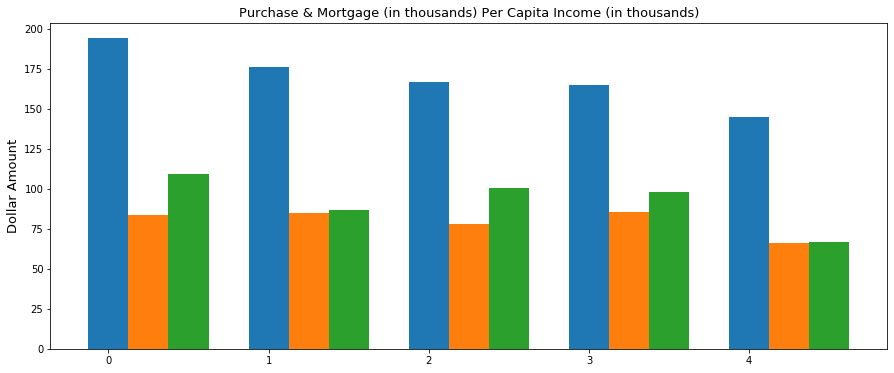

In [26]:
species = index_list

housing_data = {
    'Purchase Amt': top5_brooklyn_df["Purchase Amt"].values,
    'Amount Mortgaged': top5_brooklyn_df["Amount Mortgaged"].values,
    'Per Capita Income': top5_brooklyn_df["Per Capita Income"].values,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,6))

for attribute, measurement in housing_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollar Amount', fontsize=13)
ax.set_title('Purchase & Mortgage (in thousands) Per Capita Income (in thousands)', fontsize=13)
ax.set_xticks(x + width, species)
ax.set_xlabel("Brooklyn Top 5 Zipcode", fontsize=13)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)
plt.suptitle('Top 5 Purchase Amount v.s. Amount Mortgaged v.s. Per Capita Income in Brooklyn', fontsize=15)
plt.show()

## Line Chart Brooklyn - showing the amount borrowed by income level

In [27]:
complete_df.shape

(17701, 17)

In [28]:
brooklyn_complete = complete_df.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis=0)
brooklyn_complete.shape

(17694, 17)

In [29]:
brooklyn_by_zip = brooklyn_complete.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            'Per Capita Income': 'mean'})
brooklyn_by_zip.shape

(45, 8)

In [31]:
brooklyn_by_zip_income_level = brooklyn_by_zip.sort_values("Per Capita Income")
brooklyn_by_zip_income_level.head()

,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income
Zipcode,,,,,,,,
10453,23,583513.043478,26.043478,581110.130435,11021.583391,0.000000,19358.004522,19016.0
10457,61,504049.983607,21.786885,441001.622951,8288.753951,754.262295,18996.897977,20187.0
11219,162,689738.814815,49.080247,372354.808642,7009.950389,1223.790123,21585.947486,20336.0
11212,148,495542.750000,15.202703,435048.425676,8176.012591,91.216216,15607.126784,21502.0
11368,271,569080.760148,57.929889,226006.169742,4162.506050,850.695092,18787.520881,24232.0


In [32]:
brooklyn_by_zip_income_level['Zipcode'] = brooklyn_by_zip_income_level.index
final_brooklyn_by_zip_income_level = brooklyn_by_zip_income_level.set_index("Per Capita Income")
final_brooklyn_by_zip_income_level.head()

,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Zipcode
Per Capita Income,,,,,,,,
19016.0,23,583513.043478,26.043478,581110.130435,11021.583391,0.000000,19358.004522,10453
20187.0,61,504049.983607,21.786885,441001.622951,8288.753951,754.262295,18996.897977,10457
20336.0,162,689738.814815,49.080247,372354.808642,7009.950389,1223.790123,21585.947486,11219
21502.0,148,495542.750000,15.202703,435048.425676,8176.012591,91.216216,15607.126784,11212
24232.0,271,569080.760148,57.929889,226006.169742,4162.506050,850.695092,18787.520881,11368


In [33]:
investor_df = complete_df[(complete_df['Owner Occ?'] ==1)]
investor_df.shape

(9705, 17)

In [34]:
investor_index = investor_df.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis=0)
investor_index.shape

(9698, 17)

In [35]:
investor_by_zip = investor_index.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            'Per Capita Income': 'mean'})
investor_by_zip.shape

(45, 8)

In [36]:
investor_income_level = investor_by_zip.sort_values("Per Capita Income")
investor_income_level.head()

,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income
Zipcode,,,,,,,,
10453,15,564720.000000,30.533333,521535.666667,9802.513800,0.000000,25062.273600,19016.0
10457,50,487558.980000,18.540000,431634.920000,8126.812740,430.200000,21637.867532,20187.0
11219,95,682417.747368,49.894737,373118.442105,7031.119737,1309.410526,30285.699628,20336.0
11212,85,496878.823529,11.047059,449530.858824,8454.793429,158.823529,22051.482188,21502.0
11368,169,580916.065089,55.088757,241485.544379,4454.244959,769.752189,25781.054969,24232.0


In [37]:
home_owner_df = complete_df[(complete_df['Owner Occ?'] ==0)]
home_owner_df.shape

(7996, 17)

In [38]:
home_owner_df = complete_df[(complete_df['Owner Occ?'] ==0)]
home_owner_df.shape 

(7996, 17)

In [39]:
home_owner_df = complete_df[(complete_df['Owner Occ?'] ==0)]
zip_codes_to_drop = [10013, 10007, 10282, 10453, 11355, 10457, 11368]
home_owner_index = home_owner_df[~home_owner_df['Zipcode'].isin(zip_codes_to_drop)]
home_owner_index.shape

(7345, 17)

In [40]:
home_owner_by_zip = home_owner_index.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                             'Purchase Down %': 'mean',
                                                             'Amount Mortgaged': 'mean', 
                                                             'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                             'New Sales Tax Amount': 'mean', 
                                                             'Per Capita Income': 'mean'})
home_owner_by_zip.shape

(38, 8)

In [41]:
home_owner_by_zip_income_level = home_owner_by_zip.sort_values("Per Capita Income")
home_owner_by_zip_income_level.head()

,Count,Purchase Amt,Purchase Down %,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Per Capita Income
Zipcode,,,,,,,,
11219,67,700119.432836,47.925373,371272.044776,6979.934149,1102.388060,9250.478030,20336.0
11212,63,493740.111111,20.809524,415508.634921,7799.879714,0.000000,6912.361556,21502.0
11208,75,538377.253333,34.293333,453984.160000,8665.194060,0.000000,7537.281547,25229.0
11204,122,748869.647541,50.393443,400207.270492,7632.601709,1526.639344,9720.855393,25404.0
11220,76,758124.144737,45.750000,448424.855263,8510.919888,2034.868421,9596.303816,25708.0


In [42]:
columns_to_select = ['Column1', 'Column2', 'Column3']

No handles with labels found to put in legend.


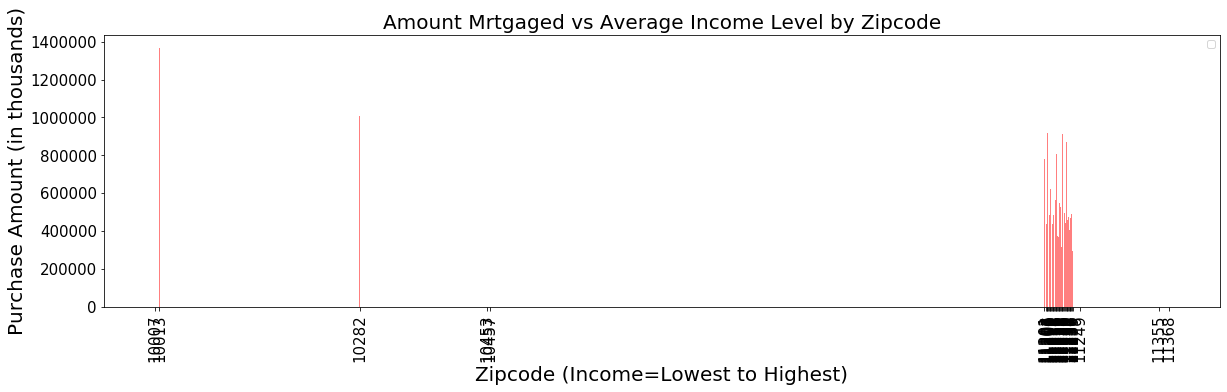

In [43]:
plt.figure(figsize=(20,5))

x_axis = brooklyn_by_zip_income_level['Zipcode'] 
y_axis = brooklyn_by_zip_income_level['Amount Mortgaged']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
# plt.plot(brooklyn_by_zip_income_level['Zipcode'], brooklyn_by_zip_income_level['Amount Mortgaged'], marker="o", label='Total Brooklyn Populaiton')
# plt.plot(zipcode_list, investor_by_zip["Purchase Amt"], marker="o", label='Purchase Amountt')
# plt.plot(zipcode_list, investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')

plt.xticks(x_axis, rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Zipcode (Income=Lowest to Highest)', fontsize=20)
plt.ylabel('Purchase Amount (in thousands)', fontsize=20)
plt.title('Amount Mrtgaged vs Average Income Level by Zipcode', fontsize=20)
plt.legend()
plt.show()


In [44]:
# plt.figure(figsize=(20,5))

# plt.plot(zipcode_list, investor_by_zip["Per Capita Income"], marker="o", label='Per Capita Income')
# plt.plot(zipcode_list, investor_by_zip["Purchase Amt"], marker="o", label='Purchase Amountt')
# plt.plot(zipcode_list, investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
# plt.xticks(zipcode_list, rotation=90)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlabel('Zipcode', fontsize=20)
# plt.ylabel('Purchase Amount (in thousands)', fontsize=20)
# plt.title('Average Income v.s. Average Purchase Amount across Zipcodes in NYC', fontsize=20)
# plt.legend()
# plt.show()